In [117]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score


# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [118]:
df=df.drop('PassengerId',axis=1).drop('Name',axis=1).drop('Ticket',axis=1).drop('Cabin',axis=1).drop('Embarked',axis=1).dropna()
df['Sex']=df['Sex'].replace('male',0).replace('female',1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
889,1,1,0,26.0,0,0,30.0000


In [119]:
X = df.drop("Survived", axis=1).values
y = df["Survived"].values

r = 4
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, )
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2,)


In [120]:
unpruned = DecisionTreeClassifier(max_depth=None, random_state=r)
unpruned.fit(X_train, y_train)
print("Performance without pruning:", unpruned.score(X_test, y_test))
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning: 0.7412587412587412
At depth: 15


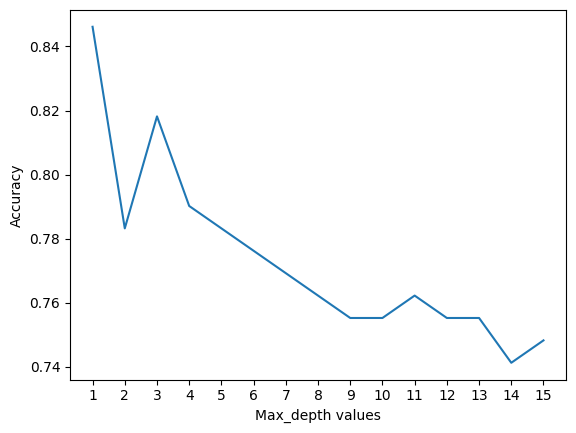

In [121]:
pruned_depths = range(1,unpruned.tree_.max_depth+1)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=r)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores.append(score)

fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores)
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

In [122]:
best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:', best_depth)

pruned = DecisionTreeClassifier(max_depth=best_depth)
pruned.fit(X, y)

Best performance reached at depth of: 1


DecisionTreeClassifier(max_depth=1)

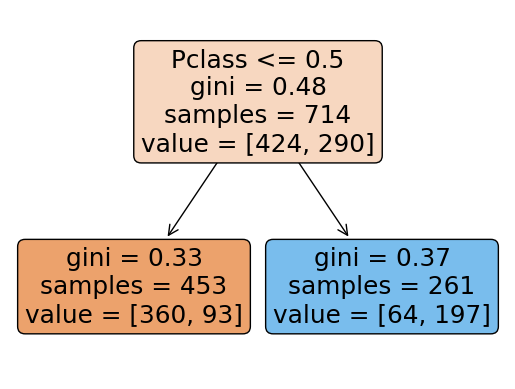

In [123]:
fig = plt.figure()
columns='Survived','Pclass','Sex','Age','SibSp','Parch','Fare'
tree.plot_tree(pruned, rounded = True, proportion = False, precision = 2, filled = True,feature_names = columns) #display tree
plt.show()

In [124]:
train_accuracies = []
dev_accuracies = []

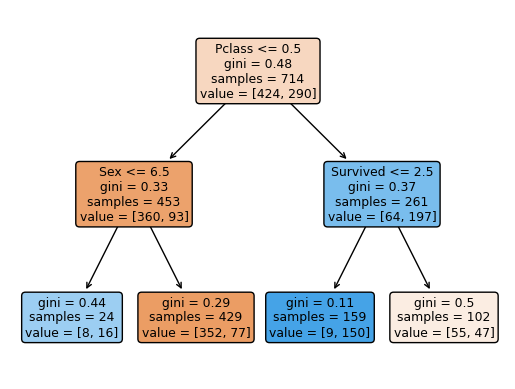

In [125]:
pruned_2 = DecisionTreeClassifier(max_depth=2)
pruned_2.fit(X, y)
fig = plt.figure()
tree.plot_tree(pruned_2, rounded = True, proportion = False, precision = 2, filled = True,feature_names = columns) 
plt.show()

In [126]:
clf = DecisionTreeClassifier(max_depth=2, random_state=r)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_dev_pred = clf.predict(X_dev)
dev_accuracy = accuracy_score(y_dev, y_dev_pred)
print('At Depth ',2)
print('Train accuracy:',train_accuracy)
print('Dev accuracy:',dev_accuracy)

train_accuracies.append(train_accuracy)
dev_accuracies.append(dev_accuracy)

At Depth  2
Train accuracy: 0.8070175438596491
Dev accuracy: 0.7652173913043478


In [127]:
clf = DecisionTreeClassifier(max_depth=3, random_state=r)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_dev_pred = clf.predict(X_dev)
dev_accuracy = accuracy_score(y_dev, y_dev_pred)
print('At Depth ',3)
print('Train accuracy:',train_accuracy)
print('Dev accuracy:',dev_accuracy)

train_accuracies.append(train_accuracy)
dev_accuracies.append(dev_accuracy)

At Depth  3
Train accuracy: 0.8245614035087719
Dev accuracy: 0.7913043478260869


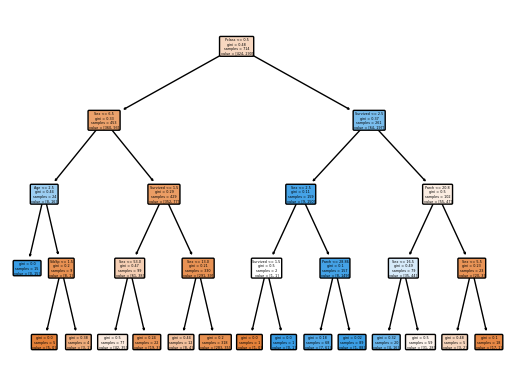

In [128]:
pruned_4 = DecisionTreeClassifier(max_depth=4)
pruned_4.fit(X, y)
fig = plt.figure()
tree.plot_tree(pruned_4, rounded = True, proportion = False, precision = 2, filled = True,feature_names = columns) 
plt.show()

In [129]:
clf = DecisionTreeClassifier(max_depth=4, random_state=r)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_dev_pred = clf.predict(X_dev)
dev_accuracy = accuracy_score(y_dev, y_dev_pred)
print('At Depth ',4)
print('Train accuracy:',train_accuracy)
print('Dev accuracy:',dev_accuracy)

train_accuracies.append(train_accuracy)
dev_accuracies.append(dev_accuracy)

At Depth  4
Train accuracy: 0.8530701754385965
Dev accuracy: 0.8


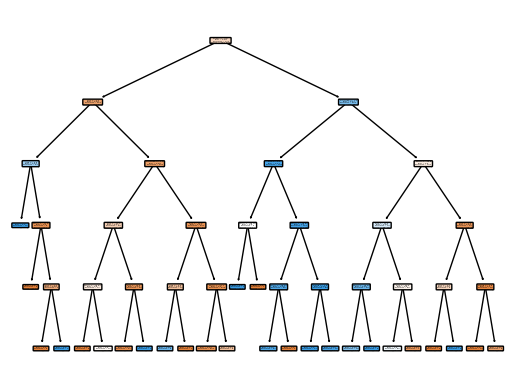

In [130]:
pruned_5 = DecisionTreeClassifier(max_depth=5)
pruned_5.fit(X, y)
fig = plt.figure()
tree.plot_tree(pruned_5, rounded = True, proportion = False, precision = 2, filled = True,feature_names = columns) 
plt.show()

In [131]:
clf = DecisionTreeClassifier(max_depth=5, random_state=r)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_dev_pred = clf.predict(X_dev)
dev_accuracy = accuracy_score(y_dev, y_dev_pred)
print('At Depth ',5)
print('Train accuracy:',train_accuracy)
print('Dev accuracy:',dev_accuracy)

train_accuracies.append(train_accuracy)
dev_accuracies.append(dev_accuracy)

At Depth  5
Train accuracy: 0.8706140350877193
Dev accuracy: 0.782608695652174


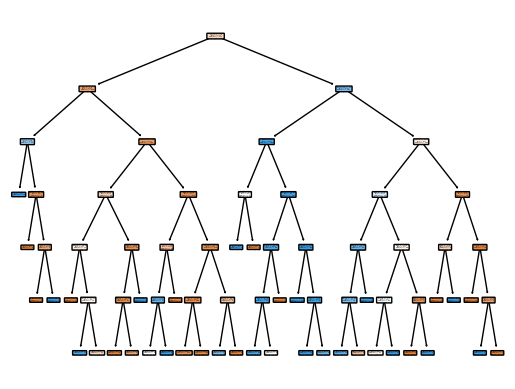

In [132]:
pruned_6 = DecisionTreeClassifier(max_depth=6)
pruned_6.fit(X, y)
fig = plt.figure()
tree.plot_tree(pruned_6, rounded = True, proportion = False, precision = 2, filled = True,feature_names = columns) 
plt.show()

In [133]:
clf = DecisionTreeClassifier(max_depth=6, random_state=r)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_dev_pred = clf.predict(X_dev)
dev_accuracy = accuracy_score(y_dev, y_dev_pred)
print('At Depth ',6)
print('Train accuracy:',train_accuracy)
print('Dev accuracy:',dev_accuracy)

train_accuracies.append(train_accuracy)
dev_accuracies.append(dev_accuracy)

At Depth  6
Train accuracy: 0.881578947368421
Dev accuracy: 0.7913043478260869


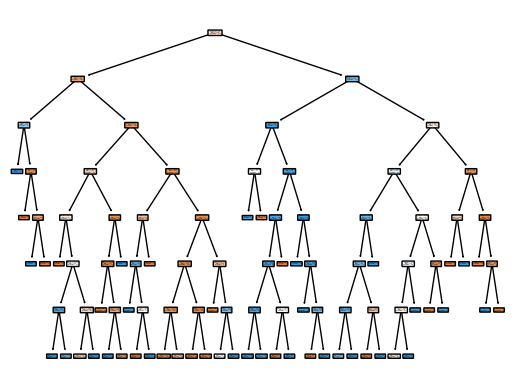

In [134]:
pruned_7 = DecisionTreeClassifier(max_depth=7)
pruned_7.fit(X, y)
fig = plt.figure()
tree.plot_tree(pruned_7, rounded = True, proportion = False, precision = 2, filled = True,feature_names = columns) 
plt.show()

In [135]:
clf = DecisionTreeClassifier(max_depth=7, random_state=r)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_dev_pred = clf.predict(X_dev)
dev_accuracy = accuracy_score(y_dev, y_dev_pred)
print('At Depth ',7)
print('Train accuracy:',train_accuracy)
print('Dev accuracy:',dev_accuracy)

train_accuracies.append(train_accuracy)
dev_accuracies.append(dev_accuracy)

At Depth  7
Train accuracy: 0.9078947368421053
Dev accuracy: 0.8


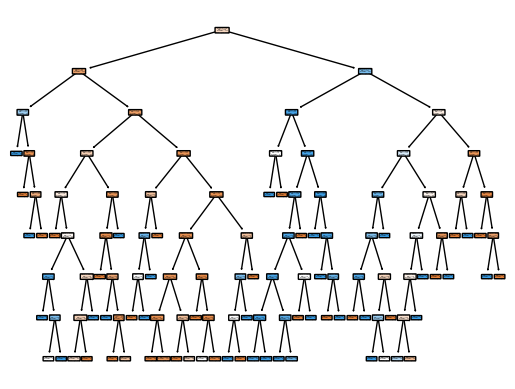

In [136]:
pruned_8 = DecisionTreeClassifier(max_depth=8)
pruned_8.fit(X, y)
fig = plt.figure()
tree.plot_tree(pruned_8, rounded = True, proportion = False, precision = 2, filled = True,feature_names = columns) 
plt.show()

In [137]:
clf = DecisionTreeClassifier(max_depth=8, random_state=r)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_dev_pred = clf.predict(X_dev)
dev_accuracy = accuracy_score(y_dev, y_dev_pred)
print('At Depth ',8)
print('Train accuracy:',train_accuracy)
print('Dev accuracy:',dev_accuracy)

train_accuracies.append(train_accuracy)
dev_accuracies.append(dev_accuracy)

At Depth  8
Train accuracy: 0.9210526315789473
Dev accuracy: 0.7652173913043478


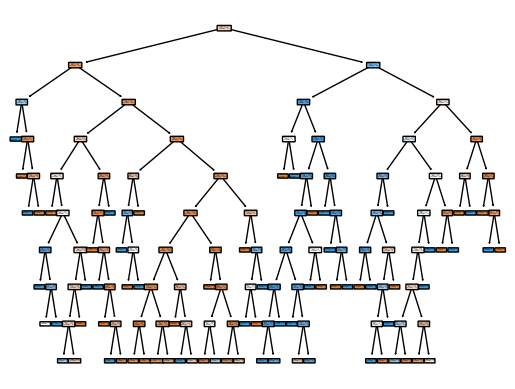

In [138]:
pruned_9 = DecisionTreeClassifier(max_depth=9)
pruned_9.fit(X, y)
fig = plt.figure()
tree.plot_tree(pruned_9, rounded = True, proportion = False, precision = 2, filled = True,feature_names = columns) 
plt.show()

In [139]:
clf = DecisionTreeClassifier(max_depth=9, random_state=r)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_dev_pred = clf.predict(X_dev)
dev_accuracy = accuracy_score(y_dev, y_dev_pred)
print('At Depth ',9)
print('Train accuracy:',train_accuracy)
print('Dev accuracy:',dev_accuracy)

train_accuracies.append(train_accuracy)
dev_accuracies.append(dev_accuracy)

At Depth  9
Train accuracy: 0.9364035087719298
Dev accuracy: 0.782608695652174


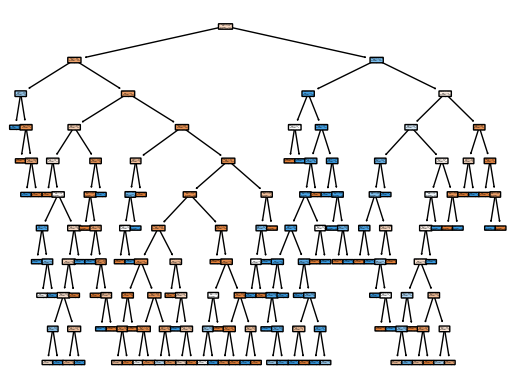

In [140]:
pruned_10 = DecisionTreeClassifier(max_depth=10)
pruned_10.fit(X, y)
fig = plt.figure()
tree.plot_tree(pruned_10, rounded = True, proportion = False, precision = 2, filled = True,feature_names = columns) 
plt.show()

In [141]:
clf = DecisionTreeClassifier(max_depth=10, random_state=r)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_dev_pred = clf.predict(X_dev)
dev_accuracy = accuracy_score(y_dev, y_dev_pred)
print('At Depth ',10)
print('Train accuracy:',train_accuracy)
print('Dev accuracy:',dev_accuracy)

train_accuracies.append(train_accuracy)
dev_accuracies.append(dev_accuracy)

At Depth  10
Train accuracy: 0.956140350877193
Dev accuracy: 0.7478260869565218


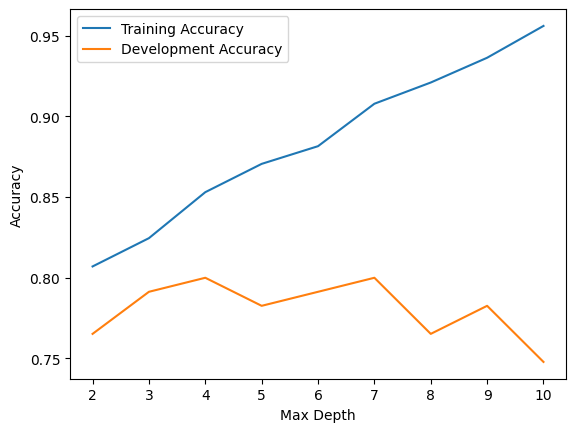

In [142]:
max_depths=[2,3,4,5,6,7,8,9,10]

plt.plot(max_depths, train_accuracies, label="Training Accuracy")
plt.plot(max_depths, dev_accuracies, label="Development Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The training accuracy line increases with max depth. Higher training accuracy leads to over fitting. Development accuracy increases to a certain point, the decreases again.The optimum value of the max_depth parameter is the value at which the development accuracy is the highest (4)

In [147]:
optimal_max_depth = 4
tree_final = DecisionTreeClassifier(max_depth=optimal_max_depth)
tree_final.fit(X_train, y_train)

y_test_pred = tree_final.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Test Accuracy:', test_accuracy)

Test Accuracy: 0.7902097902097902
